In [183]:
%matplotlib qt
import pharynx_io
import image_processing
import numpy as np
import matplotlib.pyplot as plt
import skimage.measure
import seaborn as sns
from skimage import segmentation
import xarray as xr
from scipy.interpolate import UnivariateSpline, interp1d
from matplotlib.widgets import Slider, Button, RadioButtons

In [2]:
img_path = "/Users/sean/code/wormAnalysis/data/paired_ratio_movement_data_sean/2017_02_22-HD233_SAY47/2017_02_22-HD233_SAY47.tif"
strain_map_path = "/Users/sean/code/wormAnalysis/data/paired_ratio_movement_data_sean/2017_02_22-HD233_SAY47/indexer.csv"

strains = pharynx_io.load_strain_map(strain_map_path)

raw_imgs = pharynx_io.load_images(img_path, "TL/470_1/410_1/470_2/410_2", strains)

In [3]:
seg_imgs_ = raw_imgs > 2000

fl_imgs = raw_imgs[:,1,:,:]

(rot_fl, rot_seg) = image_processing.center_and_rotate_pharynxes(fl_imgs, seg_imgs_[:,1,:,:])

In [167]:
def measure_profile(fl, mid, xs):
    ys = mid(xs)
    zs = fl[np.int_(xs),np.int_(ys)]
    zs = []
    for x,y in zip(np.int_(xs),np.int_(ys)):
        zs.append(fl[y, x].data)
    return zs

In [222]:
prof_xs = np.linspace(40, 120, 100)
profs = np.asarray([measure_profile(rot_fl[i], mids[i], prof_xs) for i in range(rot_fl.shape[0])])

fig,(ax,ax1) = plt.subplots(2,1)
plt.subplots_adjust(left=0.25, bottom=0.25)

i = 0

axanimal = plt.axes([0.25, 0.1, 0.65, 0.03])

im=ax.matshow(rot_fl[i])
mid,=ax.plot(spl_xs, mids[i](spl_xs), color='r', lw=1)

xs = np.linspace(40, 120)
prof,= ax1.plot(prof_xs, profs[i,:])

def update(val):
    mid.set_ydata(mids[int(val)](spl_xs))
    prof.set_ydata(profs[int(val),:])
    im.set_data(rot_fl[int(val)])
    fig.canvas.draw_idle()

a = np.arange(0,len(strains)-1)
s_animal = Slider(axanimal, 'Animal', min(a), max(a), valinit=min(a), valstep=1)

s_animal.on_changed(update)

0

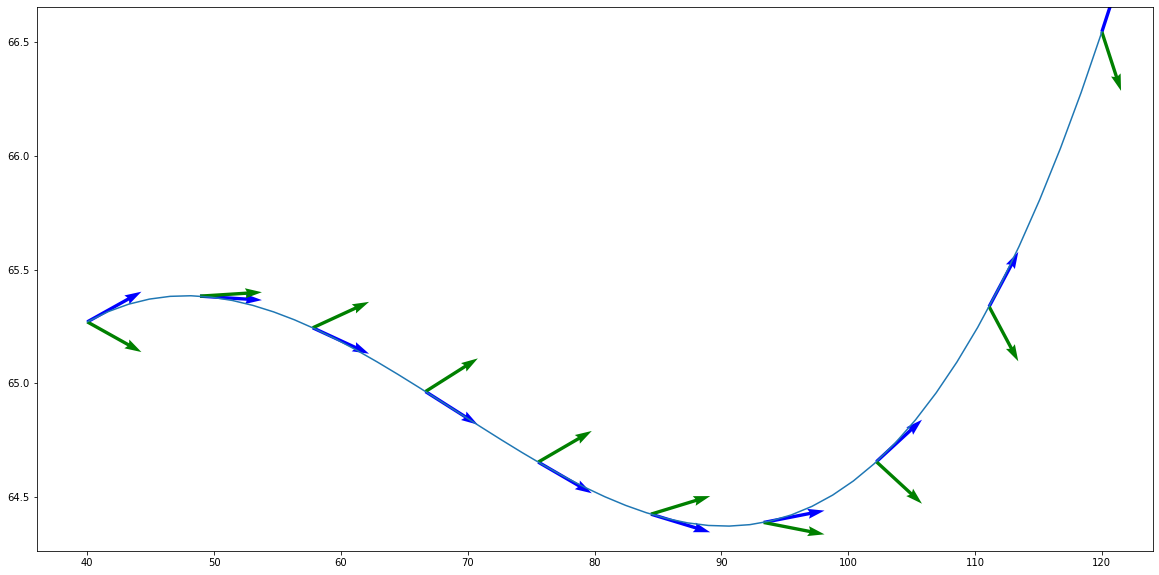

In [131]:
fig, ax1 = plt.subplots(figsize=(20,10))

xs = np.linspace(40, 120)
ax1.plot(xs, mids[i](xs))

i=2

a_xs = np.linspace(min(xs), max(xs), 10)
a_ys = mids[i](a_xs)

m = mids[i].derivative()(a_xs)
a_us = np.cos(m)
a_vs = np.sin(m)

inv_us = np.cos(-m)
inv_vs = np.sin(-m)

_=ax1.quiver(a_xs, a_ys, a_us, a_vs, width=0.003, angles='xy', color='b')
_=ax1.quiver(a_xs, a_ys, inv_us, inv_vs, width=0.003, angles='xy', color='g')

In [179]:
fmri = sns.load_dataset("fmri")

In [216]:
prof_data_stacked = xr.DataArray(profs, dims=['animal', 'x']).to_pandas().melt(value_name='i410')

In [190]:
array = xr.DataArray(np.random.randn(2, 3),
                     coords=[('x', ['a', 'b']), ('y', [0, 1, 2])])

In [220]:
sns.relplot(x="x", y="i410", data=prof_data_stacked, kind="line")